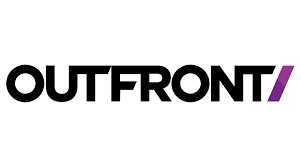


<center><H1>Exploratory Data Analysis (EDA) for Outfront on the MTA turnstiles</H1></center>
                          
                                 Leena AlQasem                   Banan Alhethlool 
                              Leenabdulh@gmail.com         banan.alhethlool@gmail.com
    

## Table of content: 

  * [Import Libraries](#first)
  * [Extract Data](#second)
  * [Exploring and Assessing dataset](#Third)
  * [Create MTA DataBase](#Forth)
  * [Data Cleaning and Filtering](#Fifth)
  * [Visualizing and Analyzing Data](#sixth)
  * [Conclution](#seventh)

***

### Import Libraries <a class="anchor" id="first"></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt
from sqlalchemy import create_engine
%matplotlib inline

***

### Extract Data <a class="anchor" id="second"></a>

The data will be extracted as below: 
> - Feb 23 to Mar 23 in 2019
> - Feb 22 to Mar 21 in 2020
> - Feb 27 to Mar 27 in 2021

In [2]:
def get_data(months):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in months:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
year_19 = get_data([190223,190302,190309,190316,190323])
year_20 = get_data([200222,200229,200307,200314,200321])
year_21 = get_data([210227,210306,210313,210320,210327])

mta = pd.concat([year_19, year_20, year_21])


In [3]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599
...,...,...,...,...,...,...,...,...,...,...,...
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544


**MTA overall (All three years)**

In [4]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599


**MTA 2019**

In [5]:
year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599


**MTA 2020**

In [6]:
year_20.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132


**MTA 2021**

In [7]:
year_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,03:00:00,REGULAR,7533822,2568869
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,07:00:00,REGULAR,7533826,2568881
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,11:00:00,REGULAR,7533854,2568925
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,15:00:00,REGULAR,7533940,2568965
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,19:00:00,REGULAR,7534089,2568994


***

## Exploring and Assessing dataset <a class="anchor" id="Third"></a>

**MTA overall (All three years)**

In [8]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3092381 entries, 0 to 209469
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [9]:
mta.describe()

,ENTRIES,EXITS
count,3.092381e+06,3.092381e+06
mean,4.183610e+07,3.415333e+07
std,2.152451e+08,1.955477e+08
min,0.000000e+00,0.000000e+00
25%,2.921930e+05,1.262800e+05
50%,1.879761e+06,1.096612e+06
75%,6.485677e+06,4.414620e+06
max,2.129469e+09,2.124297e+09


**MTA 2019**

In [10]:
year_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015745 entries, 0 to 202721
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1015745 non-null  object
 1   UNIT                                                                  1015745 non-null  object
 2   SCP                                                                   1015745 non-null  object
 3   STATION                                                               1015745 non-null  object
 4   LINENAME                                                              1015745 non-null  object
 5   DIVISION                                                              1015745 non-null  object
 6   DATE                                                                  1015745 non-n

In [11]:
year_19.describe()

,ENTRIES,EXITS
count,1.015745e+06,1.015745e+06
mean,4.041366e+07,3.341496e+07
std,2.077496e+08,1.938082e+08
min,0.000000e+00,0.000000e+00
25%,4.037780e+05,1.682090e+05
50%,2.307482e+06,1.329979e+06
75%,6.820956e+06,4.735487e+06
max,2.129469e+09,2.124297e+09


**MTA 2020**

In [12]:
year_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031793 entries, 0 to 206744
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1031793 non-null  object
 1   UNIT                                                                  1031793 non-null  object
 2   SCP                                                                   1031793 non-null  object
 3   STATION                                                               1031793 non-null  object
 4   LINENAME                                                              1031793 non-null  object
 5   DIVISION                                                              1031793 non-null  object
 6   DATE                                                                  1031793 non-n

In [13]:
year_20.describe()

,ENTRIES,EXITS
count,1.031793e+06,1.031793e+06
mean,4.296216e+07,3.525515e+07
std,2.191006e+08,1.989931e+08
min,0.000000e+00,0.000000e+00
25%,3.164780e+05,1.399490e+05
50%,1.910212e+06,1.104287e+06
75%,6.529658e+06,4.456098e+06
max,2.128808e+09,2.123385e+09


**MTA 2021**

In [14]:
year_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044843 entries, 0 to 209469
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1044843 non-null  object
 1   UNIT                                                                  1044843 non-null  object
 2   SCP                                                                   1044843 non-null  object
 3   STATION                                                               1044843 non-null  object
 4   LINENAME                                                              1044843 non-null  object
 5   DIVISION                                                              1044843 non-null  object
 6   DATE                                                                  1044843 non-n

In [15]:
year_21.describe()

,ENTRIES,EXITS
count,1.044843e+06,1.044843e+06
mean,4.210694e+07,3.378309e+07
std,2.185310e+08,1.937864e+08
min,0.000000e+00,0.000000e+00
25%,2.227940e+05,9.385450e+04
50%,1.483456e+06,8.963570e+05
75%,6.162789e+06,4.049248e+06
max,2.128709e+09,2.123017e+09


***

## Create MTA DataBase <a class="anchor" id="Forth"></a>

In [16]:
#year_19.to_csv('MTA_19_dataset.csv', encoding = 'utf-8', index=False)
#year_two.to_csv('MTA_20_dataset.csv', encoding = 'utf-8', index=False)
#year_three.to_csv('MTA_21_dataset.csv', encoding = 'utf-8', index=False)
#mta.to_csv('MTA_dataset.csv', encoding = 'utf-8', index=False)

In [17]:
engine = create_engine("sqlite:///mta.db")

In [18]:
engine.table_names()

['turnstiles_19', 'turnstiles_20', 'turnstiles_21']

In [19]:
print(engine.execute("SELECT * FROM turnstiles_19 LIMIT 1 ").fetchall())

[('C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS')]


In [20]:
pd.read_sql('SELECT * FROM turnstiles_20 limit 5;', engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_,TIME_,DESC_,ENTRIES,EXITS
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059


In [21]:
pd.read_sql("SELECT * FROM turnstiles_21 GROUP BY CA LIMIT 2;", engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE_,TIME_,DESC_,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,03:00:00,REGULAR,7533822,2568869
1,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,02/20/2021,01:00:00,REGULAR,4410904,7594572


***

## Data Cleaning and Filtering <a class="anchor" id="Fifth"></a>

### Formatting the date and time

**MTA 2019**

In [22]:
year_19["DATE_TIME"] = pd.to_datetime(year_19.DATE + " " + year_19.TIME, format="%m/%d/%Y %H:%M:%S")

In [23]:
year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412,2019-02-16 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425,2019-02-16 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508,2019-02-16 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549,2019-02-16 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599,2019-02-16 19:00:00


In [24]:
year_19['DAY'] = pd.to_datetime(year_19['DATE']).dt.day_name()
year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412,2019-02-16 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425,2019-02-16 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508,2019-02-16 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549,2019-02-16 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599,2019-02-16 19:00:00,Saturday


In [25]:
bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_19['TIME_conv'] = pd.to_datetime(year_19["TIME"])
hours = year_19['TIME_conv'].dt.hour
year_19['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412,2019-02-16 03:00:00,Saturday,2021-10-07 03:00:00,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425,2019-02-16 07:00:00,Saturday,2021-10-07 07:00:00,Morning
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508,2019-02-16 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549,2019-02-16 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599,2019-02-16 19:00:00,Saturday,2021-10-07 19:00:00,Evening


**MTA 2020**

In [26]:
year_20["DATE_TIME"] = pd.to_datetime(year_20.DATE + " " + year_20.TIME, format="%m/%d/%Y %H:%M:%S")
year_20.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916,2020-02-15 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927,2020-02-15 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012,2020-02-15 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059,2020-02-15 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132,2020-02-15 19:00:00


In [27]:
year_20['DAY'] = pd.to_datetime(year_20['DATE']).dt.day_name()
year_20.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916,2020-02-15 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927,2020-02-15 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012,2020-02-15 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059,2020-02-15 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132,2020-02-15 19:00:00,Saturday


In [28]:
bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_20['TIME_conv'] = pd.to_datetime(year_20["TIME"])
hours = year_20['TIME_conv'].dt.hour
year_20['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
year_20.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916,2020-02-15 03:00:00,Saturday,2021-10-07 03:00:00,Night
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927,2020-02-15 07:00:00,Saturday,2021-10-07 07:00:00,Morning
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012,2020-02-15 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059,2020-02-15 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132,2020-02-15 19:00:00,Saturday,2021-10-07 19:00:00,Evening


**MTA 2021**

In [29]:
year_21["DATE_TIME"] = pd.to_datetime(year_21.DATE + " " + year_21.TIME, format="%m/%d/%Y %H:%M:%S")
year_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,03:00:00,REGULAR,7533822,2568869,2021-02-20 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,07:00:00,REGULAR,7533826,2568881,2021-02-20 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,11:00:00,REGULAR,7533854,2568925,2021-02-20 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,15:00:00,REGULAR,7533940,2568965,2021-02-20 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,19:00:00,REGULAR,7534089,2568994,2021-02-20 19:00:00


In [30]:
year_21['DAY'] = pd.to_datetime(year_21['DATE']).dt.day_name()
year_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,03:00:00,REGULAR,7533822,2568869,2021-02-20 03:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,07:00:00,REGULAR,7533826,2568881,2021-02-20 07:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,11:00:00,REGULAR,7533854,2568925,2021-02-20 11:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,15:00:00,REGULAR,7533940,2568965,2021-02-20 15:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,19:00:00,REGULAR,7534089,2568994,2021-02-20 19:00:00,Saturday


In [31]:
bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_21['TIME_conv'] = pd.to_datetime(year_21["TIME"])
hours = year_21['TIME_conv'].dt.hour
year_21['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
year_21.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD
209465,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,05:00:00,REGULAR,5554,544,2021-03-26 05:00:00,Friday,2021-10-07 05:00:00,Morning
209466,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,09:00:00,REGULAR,5554,544,2021-03-26 09:00:00,Friday,2021-10-07 09:00:00,Morning
209467,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,13:00:00,REGULAR,5554,544,2021-03-26 13:00:00,Friday,2021-10-07 13:00:00,Afternoon
209468,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,17:00:00,REGULAR,5554,544,2021-03-26 17:00:00,Friday,2021-10-07 17:00:00,Afternoon
209469,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/26/2021,21:00:00,REGULAR,5554,544,2021-03-26 21:00:00,Friday,2021-10-07 21:00:00,Evening


###  *Removing whitespaces from all columns*

In [32]:
def strip(names):
    stripped = []
    for name in names:
        stripped.append(name.strip())
    return stripped

**MTA 2019**

In [33]:
year_19.columns = strip(year_19.columns)
year_19.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DAY', 'TIME_conv', 'PERIOD'],
      dtype='object')

**MTA 2020**

In [34]:
year_20.columns = strip(year_20.columns)
year_20.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DAY', 'TIME_conv', 'PERIOD'],
      dtype='object')

**MTA 2021**

In [35]:
year_21.columns = strip(year_21.columns)
year_21.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME', 'DAY', 'TIME_conv', 'PERIOD'],
      dtype='object')

## Finding the Traffic

In [36]:
year_19['total'] = abs(year_19['ENTRIES'].diff()) + abs(year_19['EXITS'].diff())
year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412,2019-02-16 03:00:00,Saturday,2021-10-07 03:00:00,Night,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425,2019-02-16 07:00:00,Saturday,2021-10-07 07:00:00,Morning,25.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508,2019-02-16 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,142.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549,2019-02-16 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,187.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599,2019-02-16 19:00:00,Saturday,2021-10-07 19:00:00,Evening,353.0


In [37]:
year_19 = year_19.dropna() 

year_19.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425,2019-02-16 07:00:00,Saturday,2021-10-07 07:00:00,Morning,25.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508,2019-02-16 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,142.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549,2019-02-16 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,187.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599,2019-02-16 19:00:00,Saturday,2021-10-07 19:00:00,Evening,353.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,23:00:00,REGULAR,6948381,2356623,2019-02-16 23:00:00,Saturday,2021-10-07 23:00:00,Night,219.0


In [38]:
year_20['total'] = abs(year_20['ENTRIES'].diff()) + abs(year_20['EXITS'].diff())
year_20.head()  

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,03:00:00,RECOVR AUD,7379676,2502916,2020-02-15 03:00:00,Saturday,2021-10-07 03:00:00,Night,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927,2020-02-15 07:00:00,Saturday,2021-10-07 07:00:00,Morning,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012,2020-02-15 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,138.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059,2020-02-15 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,235.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132,2020-02-15 19:00:00,Saturday,2021-10-07 19:00:00,Evening,381.0


In [39]:
year_20 = year_20.dropna() 

year_20.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,07:00:00,RECOVR AUD,7379687,2502927,2020-02-15 07:00:00,Saturday,2021-10-07 07:00:00,Morning,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,11:00:00,REGULAR,7379740,2503012,2020-02-15 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,138.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,15:00:00,REGULAR,7379928,2503059,2020-02-15 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,235.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,19:00:00,REGULAR,7380236,2503132,2020-02-15 19:00:00,Saturday,2021-10-07 19:00:00,Evening,381.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/15/2020,23:00:00,REGULAR,7380372,2503176,2020-02-15 23:00:00,Saturday,2021-10-07 23:00:00,Night,180.0


In [40]:
year_21['total'] = abs(year_21['ENTRIES'].diff()) + abs(year_21['EXITS'].diff())
year_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,03:00:00,REGULAR,7533822,2568869,2021-02-20 03:00:00,Saturday,2021-10-07 03:00:00,Night,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,07:00:00,REGULAR,7533826,2568881,2021-02-20 07:00:00,Saturday,2021-10-07 07:00:00,Morning,16.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,11:00:00,REGULAR,7533854,2568925,2021-02-20 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,72.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,15:00:00,REGULAR,7533940,2568965,2021-02-20 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,126.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,19:00:00,REGULAR,7534089,2568994,2021-02-20 19:00:00,Saturday,2021-10-07 19:00:00,Evening,178.0


In [41]:
year_21 = year_21.dropna() 

year_21.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,07:00:00,REGULAR,7533826,2568881,2021-02-20 07:00:00,Saturday,2021-10-07 07:00:00,Morning,16.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,11:00:00,REGULAR,7533854,2568925,2021-02-20 11:00:00,Saturday,2021-10-07 11:00:00,Afternoon,72.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,15:00:00,REGULAR,7533940,2568965,2021-02-20 15:00:00,Saturday,2021-10-07 15:00:00,Afternoon,126.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,19:00:00,REGULAR,7534089,2568994,2021-02-20 19:00:00,Saturday,2021-10-07 19:00:00,Evening,178.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/20/2021,23:00:00,REGULAR,7534197,2569013,2021-02-20 23:00:00,Saturday,2021-10-07 23:00:00,Night,127.0


### *Handling Missing values*

**MTA 2019**

In [42]:
year_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015744 entries, 1 to 202721
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   C/A        1015744 non-null  object        
 1   UNIT       1015744 non-null  object        
 2   SCP        1015744 non-null  object        
 3   STATION    1015744 non-null  object        
 4   LINENAME   1015744 non-null  object        
 5   DIVISION   1015744 non-null  object        
 6   DATE       1015744 non-null  object        
 7   TIME       1015744 non-null  object        
 8   DESC       1015744 non-null  object        
 9   ENTRIES    1015744 non-null  int64         
 10  EXITS      1015744 non-null  int64         
 11  DATE_TIME  1015744 non-null  datetime64[ns]
 12  DAY        1015744 non-null  object        
 13  TIME_conv  1015744 non-null  datetime64[ns]
 14  PERIOD     1015744 non-null  category      
 15  total      1015744 non-null  float64       
dtypes

In [43]:
year_19.isna().any()

C/A          False
UNIT         False
SCP          False
STATION      False
LINENAME     False
DIVISION     False
DATE         False
TIME         False
DESC         False
ENTRIES      False
EXITS        False
DATE_TIME    False
DAY          False
TIME_conv    False
PERIOD       False
total        False
dtype: bool

**MTA 2020**

In [44]:
year_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031792 entries, 1 to 206744
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   C/A        1031792 non-null  object        
 1   UNIT       1031792 non-null  object        
 2   SCP        1031792 non-null  object        
 3   STATION    1031792 non-null  object        
 4   LINENAME   1031792 non-null  object        
 5   DIVISION   1031792 non-null  object        
 6   DATE       1031792 non-null  object        
 7   TIME       1031792 non-null  object        
 8   DESC       1031792 non-null  object        
 9   ENTRIES    1031792 non-null  int64         
 10  EXITS      1031792 non-null  int64         
 11  DATE_TIME  1031792 non-null  datetime64[ns]
 12  DAY        1031792 non-null  object        
 13  TIME_conv  1031792 non-null  datetime64[ns]
 14  PERIOD     1031792 non-null  category      
 15  total      1031792 non-null  float64       
dtypes

In [45]:
year_20.isna().any()

C/A          False
UNIT         False
SCP          False
STATION      False
LINENAME     False
DIVISION     False
DATE         False
TIME         False
DESC         False
ENTRIES      False
EXITS        False
DATE_TIME    False
DAY          False
TIME_conv    False
PERIOD       False
total        False
dtype: bool

**MTA 2021**

In [46]:
year_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044842 entries, 1 to 209469
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   C/A        1044842 non-null  object        
 1   UNIT       1044842 non-null  object        
 2   SCP        1044842 non-null  object        
 3   STATION    1044842 non-null  object        
 4   LINENAME   1044842 non-null  object        
 5   DIVISION   1044842 non-null  object        
 6   DATE       1044842 non-null  object        
 7   TIME       1044842 non-null  object        
 8   DESC       1044842 non-null  object        
 9   ENTRIES    1044842 non-null  int64         
 10  EXITS      1044842 non-null  int64         
 11  DATE_TIME  1044842 non-null  datetime64[ns]
 12  DAY        1044842 non-null  object        
 13  TIME_conv  1044842 non-null  datetime64[ns]
 14  PERIOD     1044842 non-null  category      
 15  total      1044842 non-null  float64       
dtypes

In [47]:
year_21.isna().any()

C/A          False
UNIT         False
SCP          False
STATION      False
LINENAME     False
DIVISION     False
DATE         False
TIME         False
DESC         False
ENTRIES      False
EXITS        False
DATE_TIME    False
DAY          False
TIME_conv    False
PERIOD       False
total        False
dtype: bool

### *Removing zeros values*

**MTA 2019**

In [48]:
year_19=year_19[year_19['ENTRIES'] !=0]
year_19 =year_19[year_19['EXITS'] !=0]

mask = (year_19.EXITS == 0) & (year_19.ENTRIES == 0)
year_19[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total


**MTA 2020**

In [49]:
year_20=year_20[year_20['ENTRIES'] !=0]
year_20 =year_20[year_20['EXITS'] !=0]

mask = (year_20.EXITS == 0) & (year_20.ENTRIES == 0)
year_20[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total


**MTA 2021**

In [50]:
year_21=year_21[year_21['ENTRIES'] !=0]
year_21 =year_21[year_21['EXITS'] !=0]

mask = (year_21.EXITS == 0) & (year_21.ENTRIES == 0)
year_21[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY,TIME_conv,PERIOD,total


### *Handling Negative Numbers*

**MTA 2019**

In [51]:
year_19 = (year_19.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION", "DATE", "total", "TIME"],as_index=False).ENTRIES.first())
year_19["DAILY_ENTRIES"] = (year_19.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
year_19.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)

year_19["DAILY_ENTRIES"]=(np.where(((year_19.ENTRIES ==0) &
                                             (year_19.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET 0  
                                            ,np.where((year_19.ENTRIES !=0) & (year_19.DAILY_ENTRIES < 0)
                                            , abs(year_19.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
                                                      year_19.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
                                           ))

In [52]:
print(year_19['DAILY_ENTRIES'].describe())

count    9.563340e+05
mean     1.349690e+04
std      3.585184e+06
min      0.000000e+00
25%      3.400000e+01
50%      1.870000e+02
75%      5.170000e+02
max      2.088503e+09
Name: DAILY_ENTRIES, dtype: float64


In [53]:
year_19['DAILY_ENTRIES'].nlargest(10)

718433    2.088503e+09
147646    1.629649e+09
605681    1.611465e+09
669506    9.192697e+08
341277    6.404931e+08
740302    4.384978e+08
769051    4.021022e+08
769045    4.010876e+08
769046    4.010873e+08
769050    4.010863e+08
Name: DAILY_ENTRIES, dtype: float64

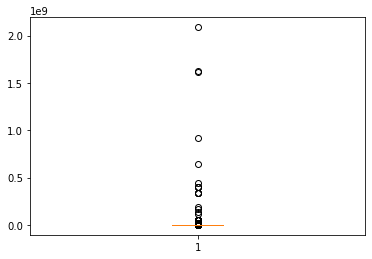

In [54]:
plt.boxplot(year_19["DAILY_ENTRIES"])
plt.show()

In [55]:
Q1 = year_19['DAILY_ENTRIES'].quantile(0.25)
Q3 = year_19['DAILY_ENTRIES'].quantile(0.75)

IQR = (Q3 - Q1)
high = (Q3 + 1.5 * IQR)
low = (Q1 - 1.5 * IQR)

year_19= year_19[~((year_19['DAILY_ENTRIES']<low) | (year_19['DAILY_ENTRIES']>high))]
year_19['DAILY_ENTRIES'].nlargest(10)

11706     1241.0
13787     1241.0
16761     1241.0
17679     1241.0
25077     1241.0
35983     1241.0
70929     1241.0
85903     1241.0
107637    1241.0
113757    1241.0
Name: DAILY_ENTRIES, dtype: float64

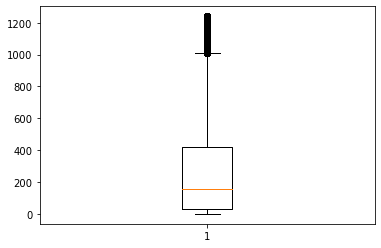

In [56]:
plt.boxplot(year_19["DAILY_ENTRIES"])
plt.show()

***

**MTA 2020**

In [57]:
year_20 = (year_20.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION", "DATE", "total", "TIME"],as_index=False).ENTRIES.first())
year_20["DAILY_ENTRIES"] = (year_20.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
year_20.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)

year_20["DAILY_ENTRIES"]=(np.where(((year_20.ENTRIES ==0) &
                                             (year_20.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET 0  
                                            ,np.where((year_20.ENTRIES !=0) & (year_20.DAILY_ENTRIES < 0)
                                            , abs(year_20.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
                                                      year_20.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
                                           ))

In [58]:
print(year_20['DAILY_ENTRIES'].describe())

count    9.719510e+05
mean     8.409094e+03
std      2.944944e+06
min      0.000000e+00
25%      2.500000e+01
50%      1.380000e+02
75%      4.070000e+02
max      2.038597e+09
Name: DAILY_ENTRIES, dtype: float64


In [59]:
#year_20_neg = year_20_copy.copy()
year_20['DAILY_ENTRIES'].nlargest(10)

500208    2.038597e+09
594154    1.140869e+09
686287    1.054866e+09
794528    1.002753e+09
618470    5.525366e+08
145516    4.684764e+08
500001    4.144281e+08
250085    3.155379e+08
232725    1.686280e+08
774579    1.348585e+08
Name: DAILY_ENTRIES, dtype: float64

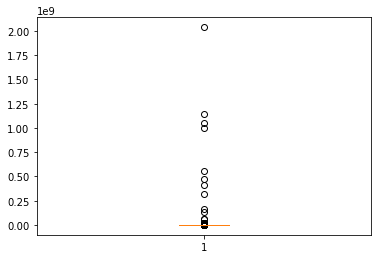

In [60]:
plt.boxplot(year_20["DAILY_ENTRIES"])
plt.show()

In [61]:
Q1 = year_20['DAILY_ENTRIES'].quantile(0.25)
Q3 = year_20['DAILY_ENTRIES'].quantile(0.75)

IQR = (Q3 - Q1)
high = (Q3 + 1.5 * IQR)
low = (Q1 - 1.5 * IQR)

year_20 = year_20[~((year_20['DAILY_ENTRIES']<low) | (year_20['DAILY_ENTRIES']>high))]
year_20['DAILY_ENTRIES'].nlargest(10)

7364     980.0
16978    980.0
18833    980.0
24614    980.0
26143    980.0
40981    980.0
53476    980.0
58512    980.0
64304    980.0
67341    980.0
Name: DAILY_ENTRIES, dtype: float64

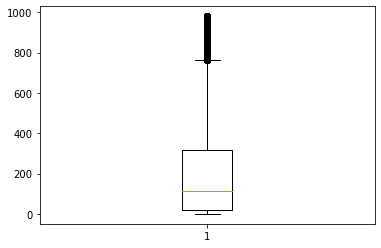

In [62]:
plt.boxplot(year_20["DAILY_ENTRIES"])
plt.show()

**MTA 2021**

In [63]:
year_21 = (year_21.groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION", "DATE", "total", "TIME"],as_index=False).ENTRIES.first())
year_21["DAILY_ENTRIES"] = (year_21
                            .groupby(["DIVISION","C/A", "UNIT", "SCP", "STATION"])[["ENTRIES"]].diff())
year_21.dropna(subset=["DAILY_ENTRIES"], axis=0, inplace = True)

year_21["DAILY_ENTRIES"]=(np.where(((year_21.ENTRIES ==0) &
                                             (year_21.DAILY_ENTRIES < 0)),0 # IN CASE OF COUNTER RESET RET 0  
                                            ,np.where((year_21.ENTRIES !=0) & (year_21.DAILY_ENTRIES < 0)
                                            , abs(year_21.DAILY_ENTRIES), # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
                                                      year_21.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
                                           ))

In [64]:
print(year_21['DAILY_ENTRIES'].describe())

count    9.840410e+05
mean     7.023498e+03
std      2.786174e+06
min      0.000000e+00
25%      8.000000e+00
50%      5.100000e+01
75%      1.460000e+02
max      1.568847e+09
Name: DAILY_ENTRIES, dtype: float64


In [65]:
year_21 = year_21.copy()
year_21['DAILY_ENTRIES'].nlargest(10)

600609    1.568847e+09
600610    1.568847e+09
775748    1.487331e+09
519449    5.370059e+08
40814     1.852592e+08
40815     1.852592e+08
40811     1.852591e+08
40813     1.852591e+08
40810     1.852591e+08
599767    9.664746e+07
Name: DAILY_ENTRIES, dtype: float64

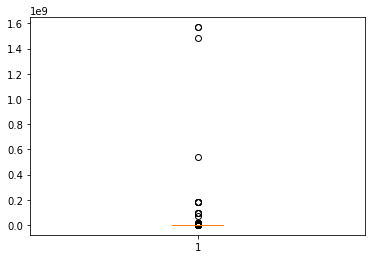

In [66]:
plt.boxplot(year_21["DAILY_ENTRIES"])
plt.show()

In [67]:
Q1 = year_21['DAILY_ENTRIES'].quantile(0.25)
Q3 = year_21['DAILY_ENTRIES'].quantile(0.75)

IQR = (Q3 - Q1)
high = (Q3 + 1.5 * IQR)
low = (Q1 - 1.5 * IQR)

year_21 = year_21[~((year_21['DAILY_ENTRIES']<low) | (year_21['DAILY_ENTRIES']>high))]
year_21['DAILY_ENTRIES'].nlargest(10)

16       353.0
1803     353.0
1998     353.0
2209     353.0
2238     353.0
4858     353.0
13893    353.0
14943    353.0
15343    353.0
19917    353.0
Name: DAILY_ENTRIES, dtype: float64

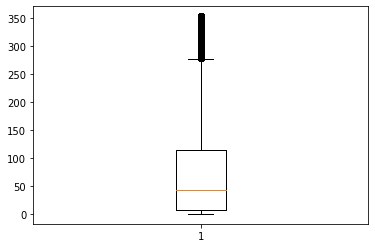

In [68]:
plt.boxplot(year_21["DAILY_ENTRIES"])
plt.show()

***

### *Handling duplicates values*

**MTA 2019**

In [69]:
(year_19
 .groupby(['STATION', 'DATE','C/A','UNIT','SCP'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# Remove duplicates
print("prior shape: ", year_19.shape)
year_19.drop_duplicates(subset=["STATION", "DATE",'C/A','UNIT','SCP'], inplace=True)
print("post shape: ", year_19.shape)

prior shape:  (889183, 10)
post shape:  (159752, 10)


**MTA 2020**

In [70]:
(year_20
 .groupby(['STATION', 'DATE','C/A','UNIT','SCP'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# Remove duplicates
print("prior shape: ", year_20.shape)
year_20.drop_duplicates(subset=["STATION", "DATE",'C/A','UNIT','SCP'], inplace=True)
print("post shape: ", year_20.shape)

prior shape:  (894194, 10)
post shape:  (162648, 10)


**MTA 2021**

In [71]:
(year_21
 .groupby(['STATION', 'DATE','C/A','UNIT','SCP'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# Remove duplicates
print("prior shape: ", year_21.shape)
year_21.drop_duplicates(subset=["STATION", "DATE",'C/A','UNIT','SCP'], inplace=True)
print("post shape: ", year_21.shape)

prior shape:  (909288, 10)
post shape:  (165295, 10)


## Visualizing and Analyzing Data <a class="anchor" id="sixth"></a>

> - Station & Traffic for each year
> - Days & Traffic for each year
> - Time Period & Traffic for each year

### *Active Days in NYC*

**MTA 2019**

In [72]:
year_19_days = year_19.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()

year_19_days['DAY'] = pd.to_datetime(year_19_days['DATE']).dt.day_name()
year_19_days.head(7)

,DATE,DAILY_ENTRIES,DAY
0,02/17/2019,1717369.0,Sunday
1,02/24/2019,1675196.0,Sunday
2,03/17/2019,1669047.0,Sunday
3,03/03/2019,1666026.0,Sunday
4,03/10/2019,1658053.0,Sunday
5,03/09/2019,1539156.0,Saturday
6,03/02/2019,1500671.0,Saturday


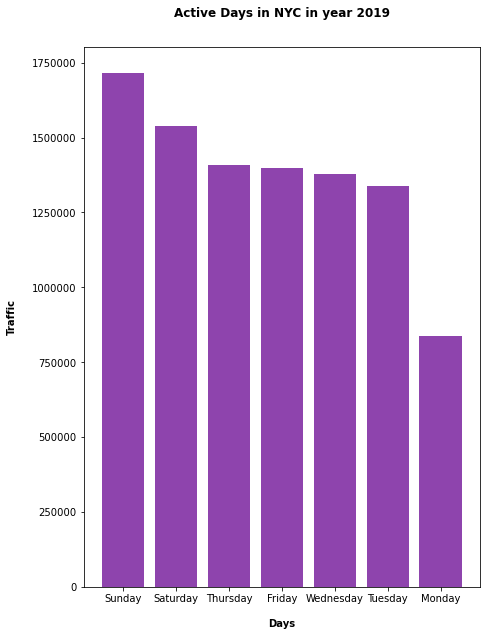

In [73]:
#fig, ax = plt.subplots(2, 1, figsize=(10, 10))

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)

ax.bar(year_19_days['DAY'], year_19_days['DAILY_ENTRIES'].sort_values(ascending=False), color='#8E44AD')
ax.set_title('Active Days in NYC in year 2019', pad=30, fontweight='bold')
ax.set_ylabel('Traffic', labelpad=15, fontweight='bold')
ax.set_xlabel('Days', labelpad=15, fontweight='bold')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

fig.subplots_adjust(hspace=0.7)

**MTA 2020**

In [74]:
year_20_days = year_20.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()

year_20_days['DAY'] = pd.to_datetime(year_20_days['DATE']).dt.day_name()
year_20_days.head(7)

,DATE,DAILY_ENTRIES,DAY
0,03/08/2020,1395329.0,Sunday
1,02/16/2020,1358560.0,Sunday
2,02/23/2020,1328026.0,Sunday
3,03/01/2020,1320980.0,Sunday
4,03/07/2020,1307391.0,Saturday
5,02/29/2020,1295613.0,Saturday
6,03/15/2020,1292590.0,Sunday


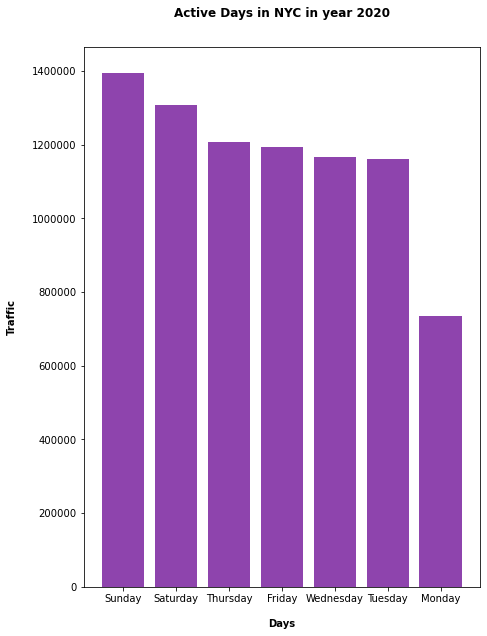

In [75]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)

ax.bar(year_20_days['DAY'], year_20_days['DAILY_ENTRIES'].sort_values(ascending=False), color='#8E44AD')
ax.set_title('Active Days in NYC in year 2020', pad=30, fontweight='bold')
ax.set_ylabel('Traffic', labelpad=15, fontweight='bold')
ax.set_xlabel('Days', labelpad=15, fontweight='bold')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

fig.subplots_adjust(hspace=0.7)

**MTA 2021**

In [76]:
year_21_days = year_21.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()

year_21_days['DAY'] = pd.to_datetime(year_21_days['DATE']).dt.day_name()
year_21_days.head(7)

,DATE,DAILY_ENTRIES,DAY
0,03/14/2021,497673.0,Sunday
1,03/21/2021,489904.0,Sunday
2,02/28/2021,487235.0,Sunday
3,02/21/2021,482484.0,Sunday
4,03/07/2021,478704.0,Sunday
5,03/20/2021,378716.0,Saturday
6,03/06/2021,366416.0,Saturday


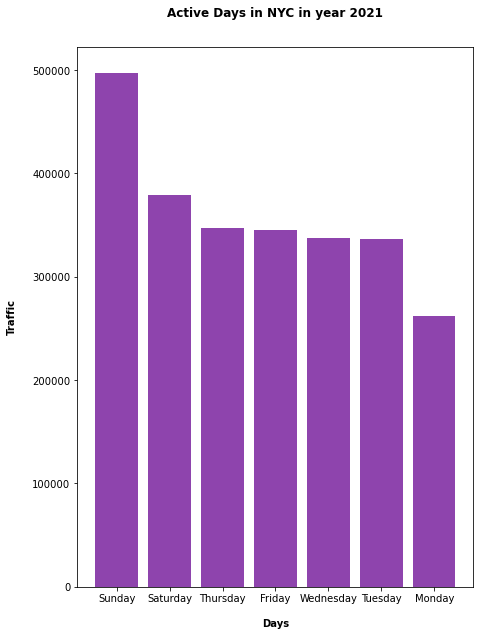

In [77]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)

ax.bar(year_21_days['DAY'], year_21_days['DAILY_ENTRIES'].sort_values(ascending=False), color='#8E44AD')
ax.set_title('Active Days in NYC in year 2021', pad=30, fontweight='bold')
ax.set_ylabel('Traffic', labelpad=15, fontweight='bold')
ax.set_xlabel('Days', labelpad=15, fontweight='bold')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

fig.subplots_adjust(hspace=0.7)

***

### *Active Period Times in NYC*

**MTA 2019**

In [78]:
year_19_period = year_19.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()


bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_19['TIME_conv'] = pd.to_datetime(year_19["TIME"])
hours = year_19['TIME_conv'].dt.hour
year_19_period['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
year_19_period['MONTH'] = pd.to_datetime(year_19_period["DATE"]).dt.month

year_19_period.dropna(subset=["PERIOD"], axis=0, inplace = True)
year_19_period.head(10)


,DATE,DAILY_ENTRIES,PERIOD,MONTH
1,02/24/2019,1675196.0,Afternoon,2
5,03/09/2019,1539156.0,Morning,3
11,03/06/2019,1377575.0,Night,3
17,02/26/2019,1339886.0,Night,2
23,03/14/2019,1276407.0,Night,3
29,02/19/2019,827609.0,Night,2


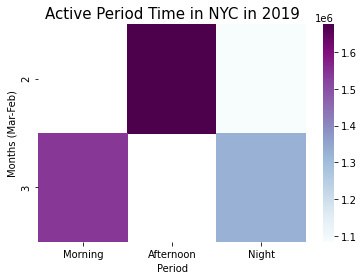

In [79]:
heat_19 = year_19_period.pivot_table('DAILY_ENTRIES', 'MONTH', 'PERIOD')
ax = sns.heatmap(heat_19, cmap="BuPu")


plt.title('Active Period Time in NYC in 2019', fontsize = 15) # title with fontsize 20
plt.xlabel('Period', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('Months (Mar-Feb)', fontsize = 10) # y-axis label with fontsize 15

plt.show()

**MTA 2020**

In [80]:
year_20_period = year_20.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()


bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_20['TIME_conv'] = pd.to_datetime(year_20["TIME"])
hours = year_20['TIME_conv'].dt.hour
year_20_period['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)

year_20_period['MONTH'] = pd.to_datetime(year_20_period["DATE"]).dt.month

year_20_period.dropna(subset=["PERIOD"], axis=0, inplace = True)
year_20_period.head(10)


,DATE,DAILY_ENTRIES,PERIOD,MONTH
1,02/16/2020,1358560.0,Afternoon,2
5,02/29/2020,1295613.0,Morning,2
11,03/05/2020,1185077.0,Morning,3
17,02/19/2020,1151549.0,Night,2
25,02/17/2020,733777.0,Morning,2
30,02/15/2020,649491.0,Night,2


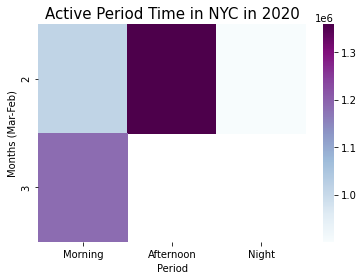

In [81]:
heat_20 = year_20_period.pivot_table('DAILY_ENTRIES', 'MONTH', 'PERIOD')
ax = sns.heatmap(heat_20, cmap="BuPu")


plt.title('Active Period Time in NYC in 2020', fontsize = 15) # title with fontsize 20
plt.xlabel('Period', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('Months (Mar-Feb)', fontsize = 10) # y-axis label with fontsize 15

plt.show()


**MTA 2021**

In [82]:
year_21_period = year_21.groupby(['DATE'])['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()


bins = [0, 5, 13, 17, 25]
labels = ['Morning','Afternoon','Evening','Night']
year_21['TIME_conv'] = pd.to_datetime(year_21["TIME"])
hours = year_21['TIME_conv'].dt.hour
year_21_period['PERIOD'] = pd.cut(hours-5+24 *(hours<5),bins=bins,labels=labels,right=False)
year_21_period['MONTH'] = pd.to_datetime(year_21_period["DATE"]).dt.month


year_21_period.dropna(subset=["PERIOD"], axis=0, inplace = True)
year_21_period.head(10)

,DATE,DAILY_ENTRIES,PERIOD,MONTH
1,03/21/2021,489904.0,Afternoon,3
5,03/20/2021,378716.0,Night,3
11,03/26/2021,340783.0,Night,3
17,03/03/2021,332986.0,Night,3
23,03/11/2021,326914.0,Night,3
29,02/20/2021,301819.0,Night,2


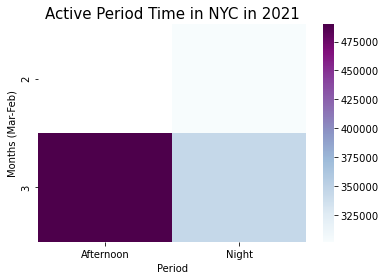

In [83]:
heat_21 = year_21_period.pivot_table('DAILY_ENTRIES', 'MONTH', 'PERIOD')
ax = sns.heatmap(heat_21, cmap="BuPu")


plt.title('Active Period Time in NYC in 2021', fontsize = 15) # title with fontsize 20
plt.xlabel('Period', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('Months (Mar-Feb)', fontsize = 10) # y-axis label with fontsize 15

plt.show()

### *Top 10 Crowded Stations in NYC*

In [84]:
year_19_station = year_19.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(by ='DAILY_ENTRIES', ascending = False).reset_index()
year_19_station.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,1169534.0
1,FULTON ST,768782.0
2,23 ST,759650.0
3,TIMES SQ-42 ST,730976.0
4,34 ST-HERALD SQ,675683.0
5,42 ST-PORT AUTH,660204.0
6,86 ST,655278.0
7,GRD CNTRL-42 ST,626742.0
8,59 ST,594942.0
9,125 ST,527493.0


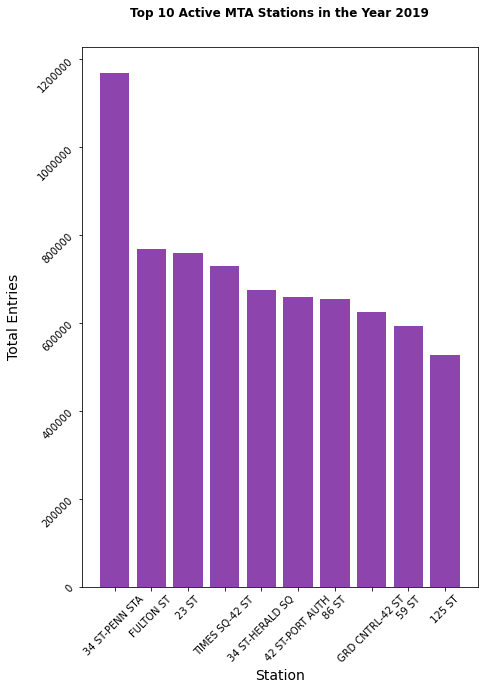

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)

ax.bar(year_19_station['STATION'][:10], year_19_station['DAILY_ENTRIES'][:10].sort_values(ascending=False), color = '#8E44AD')
ax.set_title('Top 10 Active MTA Stations in the Year 2019',  pad=30, fontweight='bold')
ax.set_ylabel('Total Entries', labelpad=15, fontsize = 14)
ax.set_xlabel('Station', fontsize = 14)
ax.tick_params(labelrotation=45)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [86]:
year_20_station = year_20.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(by ='DAILY_ENTRIES', ascending = False).reset_index().head(10)
year_20_station.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,834828.0
1,23 ST,632214.0
2,FULTON ST,607870.0
3,42 ST-PORT AUTH,513201.0
4,TIMES SQ-42 ST,512473.0
5,86 ST,505852.0
6,34 ST-HERALD SQ,473081.0
7,14 ST,447952.0
8,GRD CNTRL-42 ST,439457.0
9,CANAL ST,422873.0


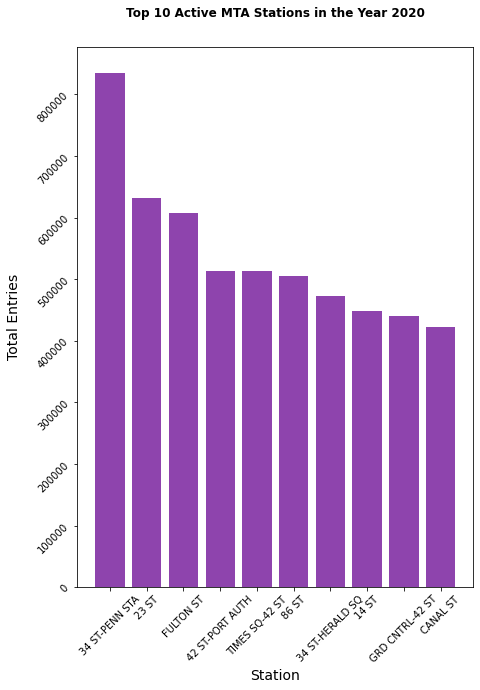

In [87]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)


ax.bar(year_20_station['STATION'][:10], year_20_station['DAILY_ENTRIES'][:10].sort_values(ascending=False), color ='#8E44AD')
ax.set_title('Top 10 Active MTA Stations in the Year 2020',  pad=30, fontweight='bold')
ax.set_ylabel('Total Entries', labelpad=15, fontsize = 14)
ax.set_xlabel('Station', fontsize = 14)
ax.tick_params(labelrotation=45)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

In [88]:
year_21_station = year_21.groupby(['STATION'])[['DAILY_ENTRIES']].sum().sort_values(by ='DAILY_ENTRIES', ascending = False).reset_index()
year_21_station.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,263522.0
1,23 ST,209607.0
2,FULTON ST,193397.0
3,86 ST,190598.0
4,59 ST,181437.0
5,34 ST-HERALD SQ,164453.0
6,42 ST-PORT AUTH,154320.0
7,125 ST,152940.0
8,GRD CNTRL-42 ST,149691.0
9,14 ST-UNION SQ,144482.0


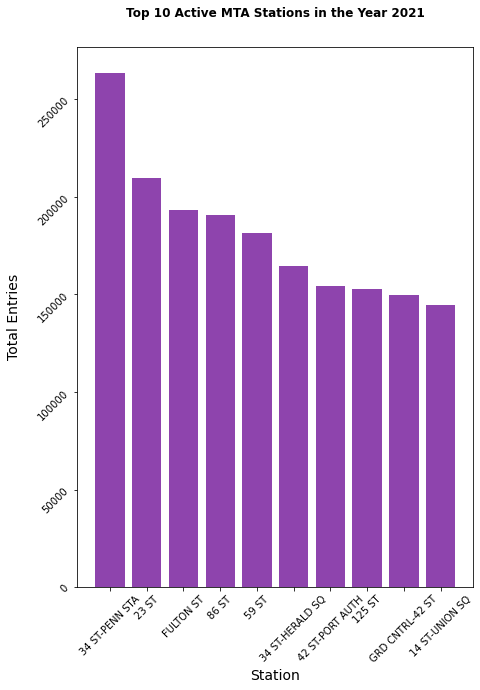

In [89]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

fig.set_figwidth(11)
fig.set_figheight(15)

ax.bar(year_21_station['STATION'][:10], year_21_station['DAILY_ENTRIES'][:10].sort_values(ascending=False), color ='#8E44AD')
ax.set_title('Top 10 Active MTA Stations in the Year 2021',  pad=30, fontweight='bold')
ax.set_ylabel('Total Entries', labelpad=15, fontsize = 14)
ax.set_xlabel('Station', fontsize = 14)
ax.tick_params(labelrotation=45)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

***